# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Christian Adi Ananta
- **Email:** chilllikehuman@gmail.com
- **ID Dicoding:** zachriss

## Menentukan Pertanyaan Bisnis

- Bagaimana performa perentalan sepeda pada kondisi cuaca tertentu?
- Bagaimana tingkat penyewaan sepeda di hari yang berbeda?


## Import Semua Packages/Library yang Digunakan

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### import day.csv

In [44]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Import hour.csv

In [45]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Memeriksa apakah data day.csv sama dengan hour.csv yang diformat ulang menjadi perhari

In [46]:
test_hour_to_day_df = hour_df.groupby(by="dteday", as_index=False).agg({
  "temp" : "mean",
  "atemp" : "mean",
  "hum" : "mean",
  "windspeed" : "mean",
  "casual" : "sum",
  "registered" : "sum",
  "cnt" : "sum"
}).reset_index()
test_hour_to_day_df.head()


,index,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,3,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,4,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:

test_day_df = day_df[["dteday",  "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].reset_index()
test_day_df.head()

,index,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,3,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,4,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### The data is already the same, so we will use the hour.csv for more detailed data

### Assessing Data

#### Renaming Column for Better Understanding

In [48]:
hour_df.rename(columns={
  "instant" : "id",
  "dteday" : "date",
  "yr" : "year",
  "mnth" : "month",
  "hr" : "hour",
  "weathersit" : "weather",
  "hum" : "humidity",
  "cnt" : "count"
}, inplace=True)


#### Checking The data generally with info()

In [49]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- The date is not in date datatype
- The date, year, and month attribute already have the same meaning, so it's redundant

#### Cheking any missing value

In [50]:
hour_df.isna().sum()

id            0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Checking any duplicated data

In [51]:
print("Duplicated Data :", hour_df.duplicated().sum())

Duplicated Data : 0


#### Checking if there is abnormality between quantitative data

In [52]:
hour_df.describe()

,id,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Changing date column to take only its day and remove "date" column

In [53]:
hour_df["date"] = pd.to_datetime(hour_df["date"])
hour_df.insert(5, "day", hour_df["date"].dt.day)
hour_df.drop(columns=["date"])

,id,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,31,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,31,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,31,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,31,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Modify the year column to match the actual year

In [54]:
#According to the Readme.txt from dataset, 0 = 2011 and 1 = 2012 
hour_df["year"] = hour_df["year"].apply(lambda x: x + 2011)

#### Checking the modified dataframe

In [55]:
hour_df.sample(5)

,id,date,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
11685,11686,2012-05-07,2,2012,5,7,2,0,1,1,1,0.50,0.4848,0.77,0.1940,1,5,6
7516,7517,2011-11-14,4,2011,11,14,19,0,1,1,1,0.60,0.6212,0.53,0.2985,28,274,302
12664,12665,2012-06-16,2,2012,6,16,21,0,6,0,2,0.64,0.6212,0.50,0.2239,98,192,290
15466,15467,2012-10-11,4,2012,10,11,15,0,4,1,1,0.52,0.5000,0.34,0.1642,102,358,460
4915,4916,2011-07-28,3,2011,7,28,17,0,4,1,1,0.84,0.8030,0.53,0.1940,45,423,468


## Exploratory Data Analysis (EDA)

### Explore ...

#### Count total of rental bikes by year

In [56]:
hour_df.groupby(by="year")["count"].sum().sort_values(ascending=False)

year
2012    2049576
2011    1243103
Name: count, dtype: int64

#### Count total of rental bikes by month

In [57]:
hour_df.groupby(by="month")["count"].sum().sort_values(ascending=False)

month
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: count, dtype: int64

#### Average count of rental bikes by weekday

In [58]:
hour_df.groupby(by="weekday").agg({
  "count" : ["mean", "sum", "max", "min"]
}).sort_values(by=("count", "sum"), ascending=False)

count                 
               mean     sum  max min
weekday                             
5        196.135907  487790  957   1
4        196.436665  485395  976   1
6        190.209793  477807  783   1
3        191.130505  473048  977   1
2        191.238891  469109  970   1
1        183.744655  455503  968   1
0        177.468825  444027  776   1

#### Total count of rental bikes based on season

In [59]:
hour_df.groupby(by="season").agg({
  "count" : ["mean", "sum"]
}).sort_values(by=("count", "sum"), ascending=False)

count         
              mean      sum
season                     
3       236.016237  1061129
2       208.344069   918589
4       198.868856   841613
1       111.114569   471348

#### Average count of rental bikes based on working day

In [60]:
average_by_working = hour_df.groupby(by="workingday").agg({
  "count" : "mean"
}).sort_values(by="count", ascending=False)
average_by_working.index = average_by_working.index.map({0:"no", 1:"yes"})
average_by_working

,count
workingday,
yes,193.207754
no,181.405332


#### Average count of rental bikes based on weather

In [61]:
hour_df.groupby(by="weather").agg({
  "count" : "mean"
}).sort_values(by="count", ascending=False)

,count
weather,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa perentalan sepeda pada kondisi cuaca tertentu?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10732\2411509764.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  average_by_weather_df["weather"].replace({


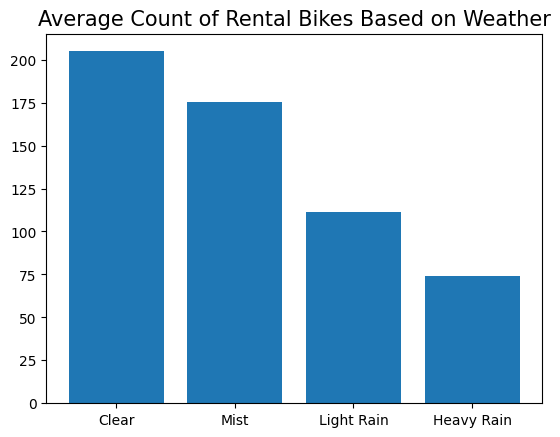

In [62]:
average_by_weather_df = hour_df.groupby(by="weather").agg({
  "count" : "mean"
}).sort_values(by="count", ascending=False).reset_index()
average_by_weather_df.rename(columns={
  "count" :"average"
}, inplace=True)
average_by_weather_df["weather"].replace({
  1: "Clear",
  2: "Mist",
  3: "Light Rain",
  4: "Heavy Rain"
}, inplace=True)

plt.bar(
  average_by_weather_df["weather"], 
  average_by_weather_df["average"],
)
plt.title("Average Count of Rental Bikes Based on Weather", loc="center", fontsize=15)
# plt.xticks(average_by_weather_df["weather"])
plt.show()

### Pertanyaan 2: Bagaimana tingkat penyewaan sepeda di hari yang berbeda?

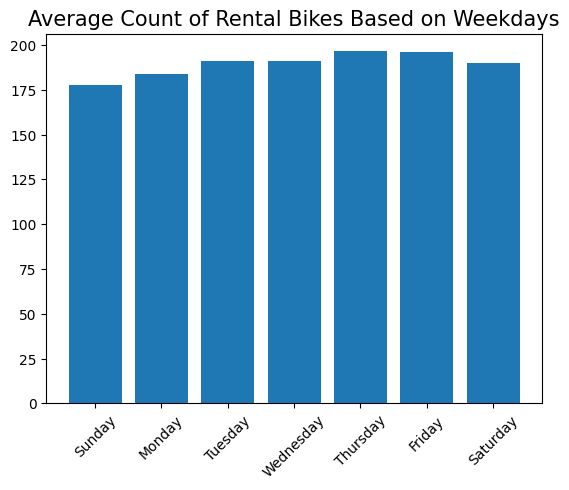

In [63]:
average_by_day_df = hour_df.groupby(by="weekday").agg({
  "count" : "mean"
}).reset_index()
average_by_day_df.rename(columns={
  "count" : "average"
}, inplace=True)
average_by_day_df["weekday"] = average_by_day_df["weekday"].replace({
  0: "Sunday",
  1: "Monday",
  2: "Tuesday",
  3: "Wednesday",
  4: "Thursday",
  5: "Friday",
  6: "Saturday"
})

plt.bar(
  average_by_day_df["weekday"], 
  average_by_day_df["average"]
)
plt.title("Average Count of Rental Bikes Based on Weekdays", loc="center", fontsize=15)
plt.xticks(rotation=45)
plt.show()


## Conclusion

- Konklusi pertanyaan 1 : Semakin bagus kondisi cuaca, semakin tinggi pula rata-rata penyewaan sepeda
- Konklusi pertanyaan 2 : Hari Kamis dan Jumat memiliki Rata-rata penyewaan sepeda yang paling tinggi